In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("ChildMOrtalytRate.csv")
df.head()

,Unnamed: 0,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
0,0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,4,Afghanistan,1971,Female,26671.0,5630.099,4.737217


In [5]:
df.rename(columns = {'Unnamed: 0' : '#', 'Gender' : 'Sex', 'Child Mortality(1 to 4)' : 'Child Mortality 1-4'},
          inplace = True)

df.head()

,#,Country,Year,Sex,Child Mortality 1-4,Total Population,Mortality Rate
0,0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,4,Afghanistan,1971,Female,26671.0,5630.099,4.737217


In [6]:
pivot1 = pd.pivot_table(df,
               index = 'Country',
               #aggfunc = ['median'], #Funciones de pivot
               values = 'Mortality Rate', #valores que queremos solamente
               #margins = True, # muestra todas las columnas
              )
pivot1

,Mortality Rate
Country,
Afghanistan,2.532872
Albania,0.078673
Algeria,1.535665
Andorra,0.011946
Angola,2.942911
...,...
Venezuela (Bolivarian Republic of),0.296726
Viet Nam,0.378387
Yemen,2.167745


In [7]:
df['Total'] = df.iloc[:,
                      2:].sum(axis=1)
df.head(2)

,#,Country,Year,Sex,Child Mortality 1-4,Total Population,Mortality Rate,Total
0,0,Afghanistan,1967,Female,26012.0,5080.813,5.119653,33064.932653
1,1,Afghanistan,1968,Female,26192.0,5202.606,5.034400,33367.640400


In [8]:
pivot2 = pd.pivot_table(df,
               index = 'Country',
               aggfunc = 'median', 
               values = 'Mortality Rate', 
               columns = 'Sex'
              )
pivot2

Sex,Female,Male,Total
Country,,,
Afghanistan,2.145863,2.014484,2.077943
Albania,0.056365,0.048544,0.052401
Algeria,0.255439,0.292833,0.274355
Andorra,NaN,NaN,0.012094
Angola,3.225387,3.445624,3.334814
...,...,...,...
Venezuela (Bolivarian Republic of),0.163357,0.182808,0.173573
Viet Nam,0.197564,0.337862,0.267042
Yemen,1.584508,1.512833,1.548546


In [9]:
pivot3 = pd.pivot_table(df,
               index = 'Country',
               aggfunc = 'mean', 
               values = 'Mortality Rate', 
               columns = 'Sex'
              )
pivot3

Sex,Female,Male,Total
Country,,,
Afghanistan,2.573643,2.492735,2.532237
Albania,0.086704,0.070742,0.078573
Algeria,1.538969,1.532353,1.535673
Andorra,NaN,NaN,0.011946
Angola,2.852868,3.033202,2.942665
...,...,...,...
Venezuela (Bolivarian Republic of),0.293499,0.299960,0.296719
Viet Nam,0.286933,0.470516,0.377711
Yemen,2.171269,2.164325,2.167642


In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
mpl.style.use('seaborn')

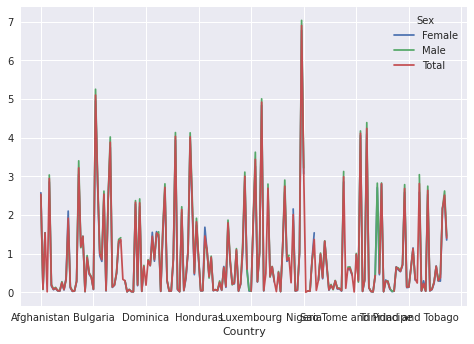

In [13]:
pivot3.plot()

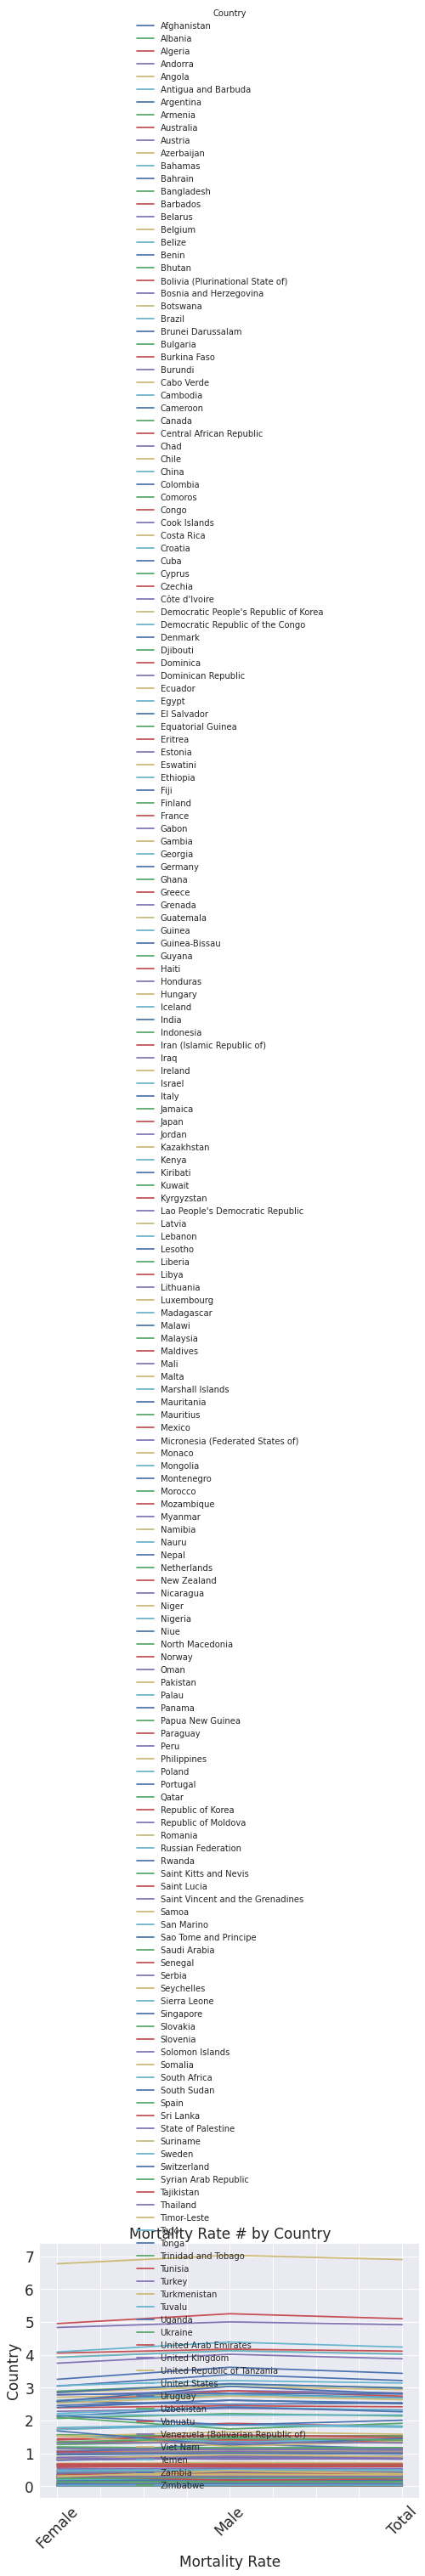

In [14]:
ni= pivot3.transpose()
ni.plot()
plt.xlabel('Mortality Rate', fontsize = 17)
plt.xticks(fontsize =17, rotation =45)
plt.ylabel('Country', fontsize = 17)
plt.yticks(fontsize = 17)
plt.title('Mortality Rate # by Country', fontsize =17)
plt.show()